In [22]:
#import numpy as np
#import tensorflow as tf
#from tensorflow.keras import layers, models
#import matplotlib.pyplot as plt
# import os

# # File paths for training images and labels
# file_path_images = "/home/giov_armando/Desktop/MNISTData/train-images.idx3-ubyte"
# file_path_labels = "/home/giov_armando/Desktop/MNISTData/train-labels.idx1-ubyte"

# # Check if the files exist
# print(f"Image file exists: {os.path.exists(file_path_images)}")
# print(f"Label file exists: {os.path.exists(file_path_labels)}")

# def load_mnist_images(file_path):
#     with open(file_path, 'rb') as f:
#         # Read magic number and dimensions
#         magic, num_images, rows, cols = np.frombuffer(f.read(16), dtype=np.uint32).newbyteorder('>')
#         print(f"magic: {magic}, num_images: {num_images}, rows: {rows}, cols: {cols}")
        
#         # Read the pixel values and reshape them into a 3D numpy array (num_images, rows, cols)
#         images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
#     return images

# def load_mnist_labels(file_path):
#     with open(file_path, 'rb') as f:
#         # Read magic number and number of labels
#         magic, num_labels = np.frombuffer(f.read(8), dtype=np.uint32).newbyteorder('>')
#         print(f"magic: {magic}, num_labels: {num_labels}")
        
#         # Read the label values
#         labels = np.frombuffer(f.read(), dtype=np.uint8)
#     return labels

# # Load images and labels
# train_images = load_mnist_images(file_path_images)
# train_labels = load_mnist_labels(file_path_labels)

# # Output the dimensions and first label
# print(f"Number of training images: {train_images.shape[0]}")
# print(f"Image dimensions: {train_images.shape[1]}x{train_images.shape[2]}")
# print(f"First label: {train_labels[0]}")


In [20]:
#import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [2]:

# Load MNIST dataset from tf and reshape

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Print dataset statistics
print(f"Number of training images: {train_images.shape[0]}")
print(f"Image dimensions: {train_images.shape[1]}x{train_images.shape[2]}")
print(f"First label: {train_labels[0]} \n ")

# Normalize the image data RGB
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#Print shape of train and test images, before and after reshaping
print(f"Dimension of array of training images: {train_images.shape}")
print(f"Dimension of array of training labels: {train_labels.shape}")
print(f"So, our training set has {train_images.shape[0]} examples, with {train_images.shape[1]}x{train_images.shape[2]} pixels per example")
print(f"Flattening out the image from a {train_images.shape[1]}x{train_images.shape[2]} array to a {train_images.shape[1]*train_images.shape[2]}-dimensional vector")


# Flatten each 28x28 image into a vector of size 784 (28*28)
x_train = train_images.reshape(-1, train_images.shape[1] * train_images.shape[2])
x_test = test_images.reshape(-1, test_images.shape[1] * test_images.shape[2])

y_train = train_labels
y_test = test_labels


# Print the new shape to verify
print(f"\nFlattened training images shape: {x_train.shape}")
print(f"Flattened test images shape: {x_test.shape}")

print(f"\nTraining images labels shape: {y_train.shape}")
print(f"Test images labels shape: {y_test.shape}")

Number of training images: 60000
Image dimensions: 28x28
First label: 5 
 
Dimension of array of training images: (60000, 28, 28)
Dimension of array of training labels: (60000,)
So, our training set has 60000 examples, with 28x28 pixels per example
Flattening out the image from a 28x28 array to a 784-dimensional vector

Flattened training images shape: (60000, 784)
Flattened test images shape: (10000, 784)

Training images labels shape: (60000,)
Test images labels shape: (10000,)


In [25]:
#test plotting  loaded images
#plt.imshow(train_images[0], cmap='gray')
#plt.title(f"Label: {train_labels[0]}")
#plt.show()
#
#
#plt.imshow(test_images[0], cmap='gray')
#plt.title(f"Label: {test_labels[0]}")
#plt.show()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8753 - loss: 0.4337 - val_accuracy: 0.9596 - val_loss: 0.1361
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9630 - loss: 0.1230 - val_accuracy: 0.9688 - val_loss: 0.1033
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0735 - val_accuracy: 0.9715 - val_loss: 0.0971
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0570 - val_accuracy: 0.9759 - val_loss: 0.0776
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0414 - val_accuracy: 0.9726 - val_loss: 0.0855
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0334 - val_accuracy: 0.9761 - val_loss: 0.0744
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9769 - val_loss: 0.0769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9939 - loss: 0.0208 - 

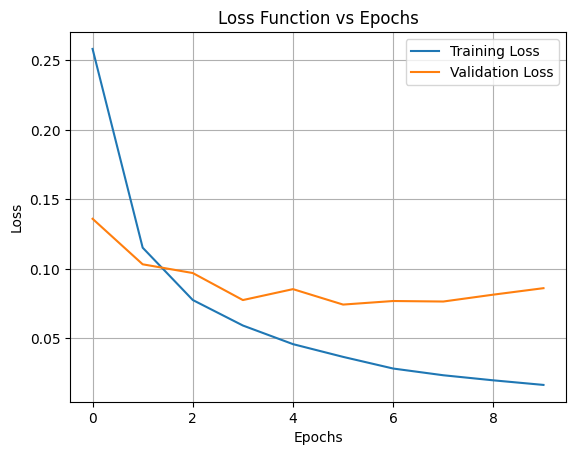

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9713 - loss: 0.1016  
Final training accuracy: 0.9947
Final dev accuracy: 0.9754

 Final training error: 0.5333304405212402 %
Final dev error: 2.460002899169922 %


In [10]:
#Neural Network without regularization

#number of nodes in hidden and output layers
n1 = 128
nout = 10

model = models.Sequential([
    layers.Dense(n1, activation='relu', input_shape=(28*28,)),
    layers.Dense(nout, activation='softmax')
])


model.summary()



# Compile the model with ADAM
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile the model using SGD optimizer
#model.compile(
#    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Specify learning rate for SGD
#    loss='sparse_categorical_crossentropy',
#    metrics=['accuracy']
#)

# Train the model and save the training history

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs Epochs')
plt.legend()
plt.grid()
plt.show()

#Evaluate the model
model.evaluate(x_test, y_test)

training_error = (1 - history.history['accuracy'][-1])
dev_error = (1 - history.history['val_accuracy'][-1])

print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final dev accuracy: {history.history['val_accuracy'][-1]:.4f}")

print(f"\nFinal training error: {training_error*100} %")
print(f"Final dev error: {dev_error*100} %")


In [12]:
#The error on the dev set is larger than that on the training set by 1.92%
#This could be due to overfitting. Let us try regularization to see if we can reduce this

#Below we try dropout regularization with a varying number of dropout rates

The error on the dev set is larger than that on the training set by 1.9266724586486816 %.
This could be due to overfitting. Let us try regularization to see if we can reduce this


Dropout rate coefficient = 0.1
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8670 - loss: 0.4647 - val_accuracy: 0.9568 - val_loss: 0.1430
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9596 - loss: 0.1346 - val_accuracy: 0.9713 - val_loss: 0.0950
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0848 - val_accuracy: 0.9757 - val_loss: 0.0827
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9788 - loss: 0.0677 - val_accuracy: 0.9754 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0557 - val_accuracy: 0.9756 - val_loss: 0.0786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0470 - val_accuracy: 0.9760 - val_loss: 0.0798
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0385 - val_accuracy: 0.9775 - val_loss: 0.0738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc

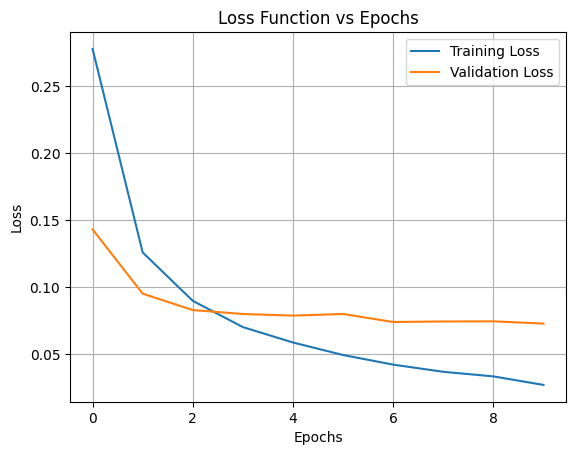

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9761 - loss: 0.0880  
Final training accuracy: 0.9911
Final dev accuracy: 0.9797

Final training error: 0.8949995040893555 %
Final dev error: 2.0299971103668213 %
Dropout rate coefficient = 0.2
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8603 - loss: 0.4805 - val_accuracy: 0.9575 - val_loss: 0.1382
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9571 - loss: 0.1459 - val_accuracy: 0.9707 - val_loss: 0.0986
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9685 - loss: 0.1061 - val_accuracy: 0.9725 - val_loss: 0.0932
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9732 - loss: 0.0862 - val_accuracy: 0.9757 - val_loss: 0.0793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9759 - loss: 0.0763 - val_accuracy: 0.9766 - val_loss: 0.0757
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9809 - loss: 0.0627 - val_accurac

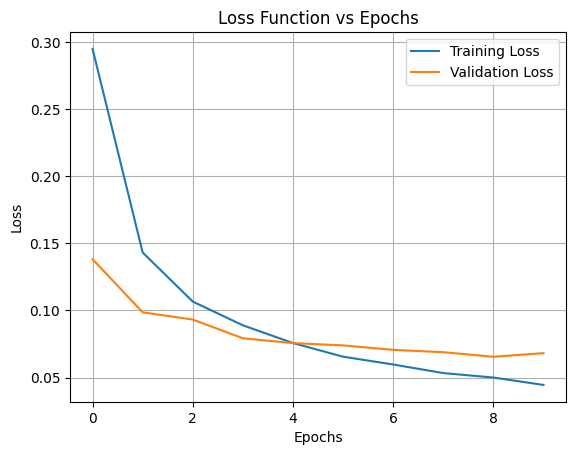

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9770 - loss: 0.0773  
Final training accuracy: 0.9849
Final dev accuracy: 0.9810

Final training error: 1.5066683292388916 %
Final dev error: 1.8999993801116943 %
Dropout rate coefficient = 0.30000000000000004
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8447 - loss: 0.5290 - val_accuracy: 0.9580 - val_loss: 0.1473
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9481 - loss: 0.1759 - val_accuracy: 0.9662 - val_loss: 0.1110
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9603 - loss: 0.1328 - val_accuracy: 0.9706 - val_loss: 0.0940
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9647 - loss: 0.1125 - val_accuracy: 0.9733 - val_loss: 0.0861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9704 - loss: 0.0948 - val_accuracy: 0.9760 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.08

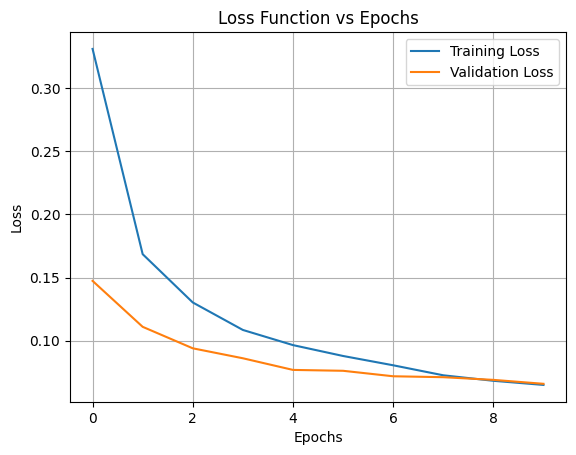

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.0772
Final training accuracy: 0.9787
Final dev accuracy: 0.9812

Final training error: 2.1300017833709717 %
Final dev error: 1.8800020217895508 %
Dropout rate coefficient = 0.4
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8349 - loss: 0.5498 - val_accuracy: 0.9535 - val_loss: 0.1628
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9411 - loss: 0.1951 - val_accuracy: 0.9664 - val_loss: 0.1098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9544 - loss: 0.1534 - val_accuracy: 0.9700 - val_loss: 0.0978
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9622 - loss: 0.1293 - val_accuracy: 0.9734 - val_loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.1144 - val_accuracy: 0.9760 - val_loss: 0.0784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.1036 - val_accuracy:

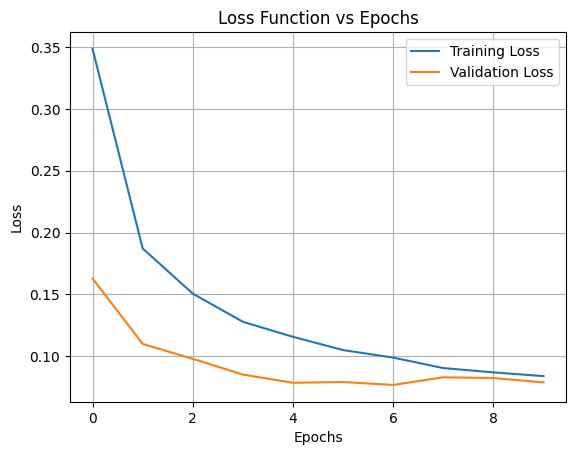

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0898
Final training accuracy: 0.9730
Final dev accuracy: 0.9764

Final training error: 2.695000171661377 %
Final dev error: 2.3599982261657715 %
Dropout rate coefficient = 0.5
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8125 - loss: 0.6185 - val_accuracy: 0.9503 - val_loss: 0.1714
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9300 - loss: 0.2349 - val_accuracy: 0.9626 - val_loss: 0.1240
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9432 - loss: 0.1903 - val_accuracy: 0.9647 - val_loss: 0.1119
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9501 - loss: 0.1645 - val_accuracy: 0.9688 - val_loss: 0.1076
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9553 - loss: 0.1467 - val_accuracy: 0.9716 - val_loss: 0.0928
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9566 - loss: 0.1404 - val_accuracy: 

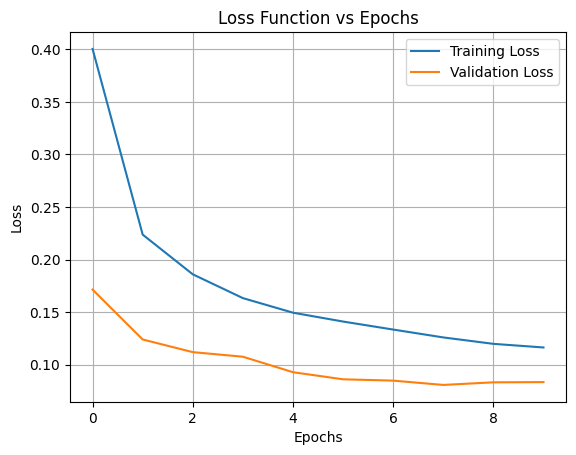

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9715 - loss: 0.0996
Final training accuracy: 0.9635
Final dev accuracy: 0.9765

Final training error: 3.6466658115386963 %
Final dev error: 2.3500025272369385 %


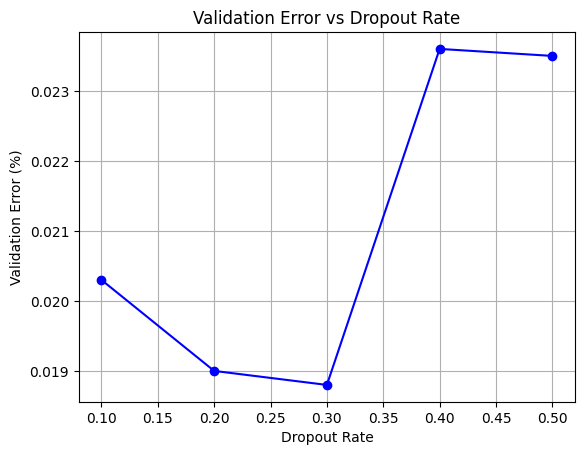

In [14]:
#Neural Network with Dropout regularization

#number of nodes in hidden and output layers
n1 = 128
nout = 10



# Initialize lists to store dropout rates and corresponding validation errors
dropout_rates = []
validation_errors = []



for i in np.arange(0.1, 0.6, 0.1):
    print(f"Dropout rate coefficient = {i}")

    model = models.Sequential([
        layers.Dense(n1, activation='relu', input_shape=(28*28,)),
        layers.Dropout(i),  # Dropout layer with 20% dropout rate
        layers.Dense(nout, activation='softmax')
    ])



    # Compile the model with ADAM
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Compile the model using SGD optimizer
    #model.compile(
    #    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Specify learning rate for SGD
    #    loss='sparse_categorical_crossentropy',
    #    metrics=['accuracy']
    #)

    # Train the model and save the training history

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


    # Plot the loss function
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function vs Epochs')
    plt.legend()
    plt.grid()
    plt.show()

    #Evaluate the model
    model.evaluate(x_test, y_test)
    
    
    training_error = (1 - history.history['accuracy'][-1])
    dev_error = (1 - history.history['val_accuracy'][-1])

    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final dev accuracy: {history.history['val_accuracy'][-1]:.4f}")

    print(f"\nFinal training error: {training_error*100} %")
    print(f"Final dev error: {dev_error*100} %")
    
    
    # Store the dropout rate and validation error
    dropout_rates.append(i)
    validation_errors.append(dev_error)
    
    
# Plot the validation error as a function of dropout rate
plt.plot(dropout_rates, validation_errors, marker='o', linestyle='-', color='b')
plt.xlabel('Dropout Rate')
plt.ylabel('Validation Error (%)')
plt.title('Validation Error vs Dropout Rate')
plt.grid(True)
plt.show()


In [ ]:
#Plotting the dev error vs dropout rate we see that it decreases, reching a minimum around dropout_rate = 0.3
#Let's see what happens if we increase the number of epochs

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8469 - loss: 0.5193 - val_accuracy: 0.9557 - val_loss: 0.1497
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9483 - loss: 0.1714 - val_accuracy: 0.9682 - val_loss: 0.1050
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9611 - loss: 0.1334 - val_accuracy: 0.9716 - val_loss: 0.0944
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.1066 - val_accuracy: 0.9743 - val_loss: 0.0809
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9708 - loss: 0.0916 - val_accuracy: 0.9762 - val_loss: 0.0741
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9739 - loss: 0.0860 - val_accuracy: 0.9787 - val_loss: 0.0712
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0730 - val_accuracy: 0.9777 - val_loss: 0.0743
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9780 - loss: 0.0688 - 

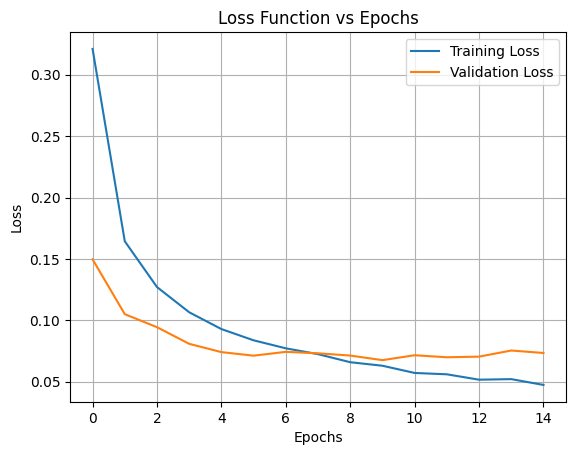

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9753 - loss: 0.0816
Final training accuracy: 0.9840
Final dev accuracy: 0.9797

Final training error: 1.6033351421356201 %
Final dev error: 2.0299971103668213 %


In [15]:
#Neural Network with Dropout regularization, 15 epochs (before it was 10)

#number of nodes in hidden and output layers
n1 = 128
nout = 10



# Initialize lists to store dropout rates and corresponding validation errors
dropout_rates = []
validation_errors = []



model = models.Sequential([
    layers.Dense(n1, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.3),  # Dropout layer with 20% dropout rate
    layers.Dense(nout, activation='softmax')
])



# Compile the model with ADAM
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile the model using SGD optimizer
#model.compile(
#    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Specify learning rate for SGD
#    loss='sparse_categorical_crossentropy',
#    metrics=['accuracy']
#)

# Train the model and save the training history

history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


# Plot the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs Epochs')
plt.legend()
plt.grid()
plt.show()

#Evaluate the model
model.evaluate(x_test, y_test)


training_error = (1 - history.history['accuracy'][-1])
dev_error = (1 - history.history['val_accuracy'][-1])

print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final dev accuracy: {history.history['val_accuracy'][-1]:.4f}")

print(f"\nFinal training error: {training_error*100} %")
print(f"Final dev error: {dev_error*100} %")



In [ ]:
#We note that increasing the validation loss reaches a plateau around epoch ≈ 10
#Instead, let's try to tune the learning rate of the algorithm to see if we can get something different

Learning Rate = 1e-06
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8535 - loss: 0.5030 - val_accuracy: 0.9543 - val_loss: 0.1514
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9487 - loss: 0.1728 - val_accuracy: 0.9682 - val_loss: 0.1073
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9604 - loss: 0.1298 - val_accuracy: 0.9716 - val_loss: 0.0906
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9678 - loss: 0.1052 - val_accuracy: 0.9754 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9723 - loss: 0.0912 - val_accuracy: 0.9773 - val_loss: 0.0746
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0853 - val_accuracy: 0.9765 - val_loss: 0.0732
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0745 - val_accuracy: 0.9777 - val_loss: 0.0709
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.

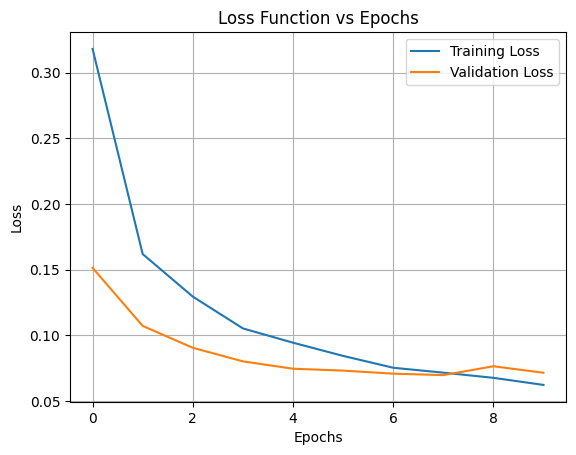

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9763 - loss: 0.0810  
Final training accuracy: 0.9796
Final dev accuracy: 0.9787

Final training error: 2.043330669403076 %
Final dev error: 2.1300017833709717 %
Learning Rate = 1e-05
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0576 - val_accuracy: 0.9800 - val_loss: 0.0716
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0544 - val_accuracy: 0.9815 - val_loss: 0.0672
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0506 - val_accuracy: 0.9815 - val_loss: 0.0694
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0477 - val_accuracy: 0.9799 - val_loss: 0.0733
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0461 - val_accuracy: 0.9815 - val_loss: 0.0692
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0465 - val_accuracy: 0.9763 

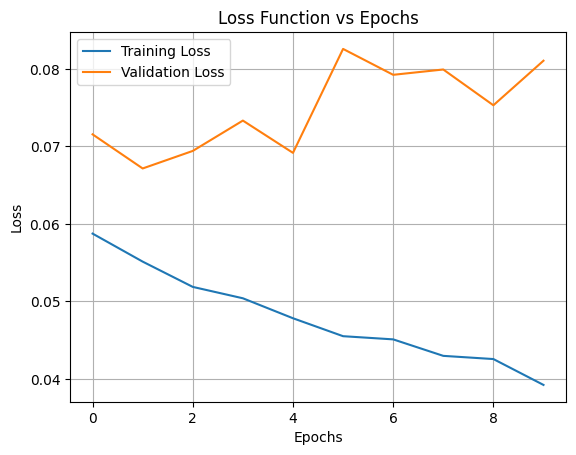

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9770 - loss: 0.0925  
Final training accuracy: 0.9864
Final dev accuracy: 0.9805

Final training error: 1.3566672801971436 %
Final dev error: 1.9500017166137695 %
Learning Rate = 0.0001
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0374 - val_accuracy: 0.9813 - val_loss: 0.0754
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0383 - val_accuracy: 0.9795 - val_loss: 0.0795
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9881 - loss: 0.0347 - val_accuracy: 0.9797 - val_loss: 0.0837
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0331 - val_accuracy: 0.9812 - val_loss: 0.0843
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0352 - val_accuracy: 0.9811 - val_loss: 0.0785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0338 - val_accuracy: 0.981

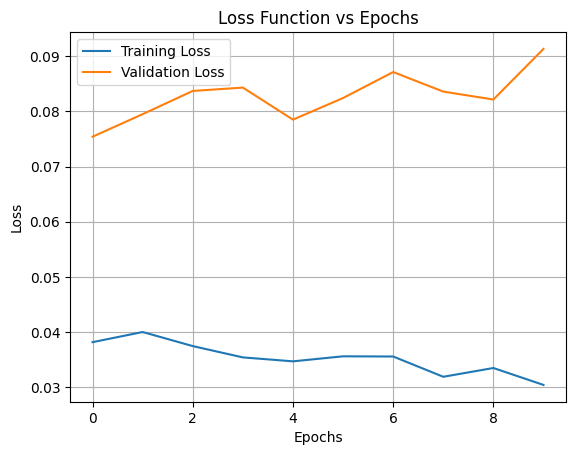

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9768 - loss: 0.1114  
Final training accuracy: 0.9896
Final dev accuracy: 0.9815

Final training error: 1.0433316230773926 %
Final dev error: 1.8499970436096191 %
Learning Rate = 0.001
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0317 - val_accuracy: 0.9815 - val_loss: 0.0847
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0287 - val_accuracy: 0.9808 - val_loss: 0.0972
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9806 - val_loss: 0.0954
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0285 - val_accuracy: 0.9822 - val_loss: 0.0860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0278 - val_accuracy: 0.9808 - val_loss: 0.1012
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9901 - loss: 0.0294 - val_accuracy: 0.9801

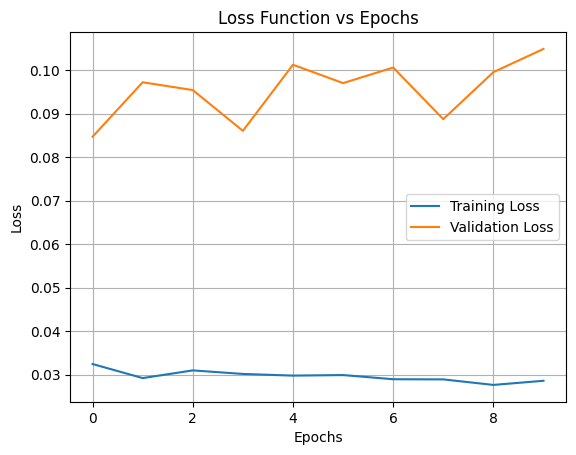

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9775 - loss: 0.1244  
Final training accuracy: 0.9899
Final dev accuracy: 0.9810

Final training error: 1.0066688060760498 %
Final dev error: 1.8999993801116943 %


ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

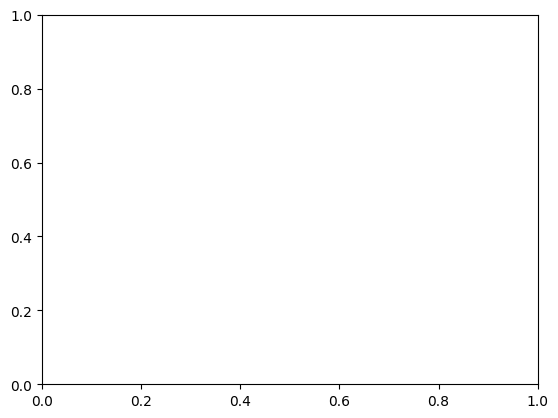

In [22]:
#Neural Network with Dropout regularization, 10 epochs, dropout_rate = 0.3


#NB Something is wrong with this code. Please fix
#
#
#
#


#number of nodes in hidden and output layers
n1 = 128
nout = 10



# Initialize lists to store dropout rates and corresponding validation errors
dropout_rates = []
validation_errors = []



model = models.Sequential([
    layers.Dense(n1, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.3),  # Dropout layer with 20% dropout rate
    layers.Dense(nout, activation='softmax')
])



for i in np.arange(-6, -2, 1):
    learning_rate_tuned = np.power(10.0,i)
    print(f"Learning Rate = {learning_rate_tuned}")

    optimizer_tuned = Adam(learning_rate=learning_rate_tuned)
    model.compile(optimizer=optimizer_tuned)

    # Compile the model with ADAM
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Compile the model using SGD optimizer
    #model.compile(
    #    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Specify learning rate for SGD
    #    loss='sparse_categorical_crossentropy',
    #    metrics=['accuracy']
    #)

    # Train the model and save the training history

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


    # Plot the loss function
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function vs Epochs')
    plt.legend()
    plt.grid()
    plt.show()

    #Evaluate the model
    model.evaluate(x_test, y_test)


    training_error = (1 - history.history['accuracy'][-1])
    dev_error = (1 - history.history['val_accuracy'][-1])

    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final dev accuracy: {history.history['val_accuracy'][-1]:.4f}")

    print(f"\nFinal training error: {training_error*100} %")
    print(f"Final dev error: {dev_error*100} %")

    
# Plot the validation error as a function of the learning rate
plt.plot(learning_rate_tuned, validation_errors, marker='o', linestyle='-', color='b')
plt.xlabel('Adam Learning Rate')
plt.ylabel('Validation Error (%)')
plt.title('Validation Error vs Learning Rate')
plt.grid(True)
plt.show()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8717 - loss: 0.6051 - val_accuracy: 0.9485 - val_loss: 0.2994
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9502 - loss: 0.2995 - val_accuracy: 0.9617 - val_loss: 0.2661
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9605 - loss: 0.2728 - val_accuracy: 0.9643 - val_loss: 0.2618
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9636 - loss: 0.2631 - val_accuracy: 0.9639 - val_loss: 0.2623
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9637 - loss: 0.2625 - val_accuracy: 0.9639 - val_loss: 0.2596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9658 - loss: 0.2539 - val_accuracy: 0.9682 - val_loss: 0.2565
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9677 - loss: 0.2537 - val_accuracy: 0.9694 - val_loss: 0.2464
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.2554 - 

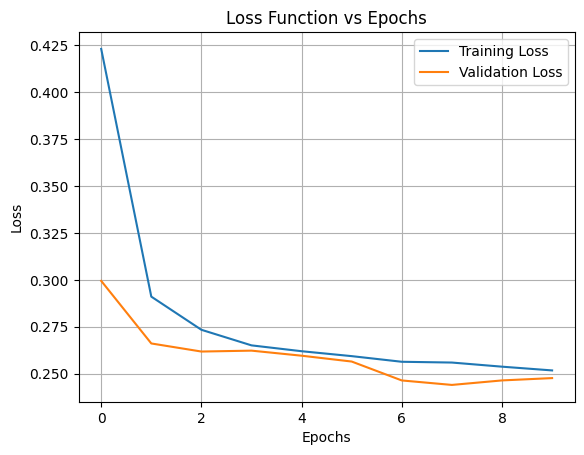

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9626 - loss: 0.2686


[0.24766342341899872, 0.9686999917030334]

In [42]:
#Neural Network with L2 regularization

#number of nodes in hidden and output layers
n1 = 128
nout = 10

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,), 
                 kernel_regularizer=regularizers.l2(0.001)),  # Apply L2 regularization
    layers.Dense(10, activation='softmax', 
                 kernel_regularizer=regularizers.l2(0.001))  # Apply L2 regularization
])



# Compile the model with ADAM
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile the model using SGD optimizer
#model.compile(
#    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Specify learning rate for SGD
#    loss='sparse_categorical_crossentropy',
#    metrics=['accuracy']
#)

# Train the model and save the training history

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


, input_shape=(28*28,)
# Plot the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function vs Epochs')
plt.legend()
plt.grid()
plt.show()

#Evaluate the model
model.evaluate(x_test, y_test)


In [29]:
#Plot NN
#from tensorflow.keras.utils import plot_model
#from graphviz import Digraph

#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [48]:
from sklearn.model_selection import train_test_split
